<a href="https://colab.research.google.com/github/kashish-lang/Loan-Prediction-Analysis/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('/content/train.csv')

In [85]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [86]:
df.shape

(614, 13)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [88]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [89]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [90]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

/tmp/ipython-input-90-690353501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-90-690353501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [91]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

/tmp/ipython-input-91-2294035902.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


In [92]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [93]:
df.duplicated().sum()

np.int64(0)

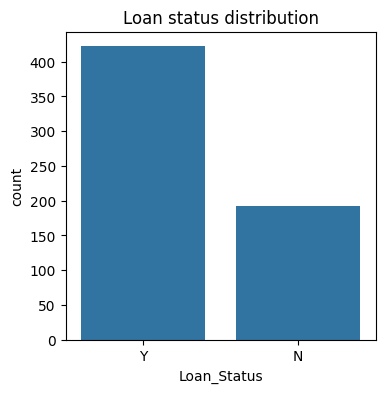

In [94]:
plt.figure(figsize=(4,4))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan status distribution')
plt.show()

Property area V/S Loan status

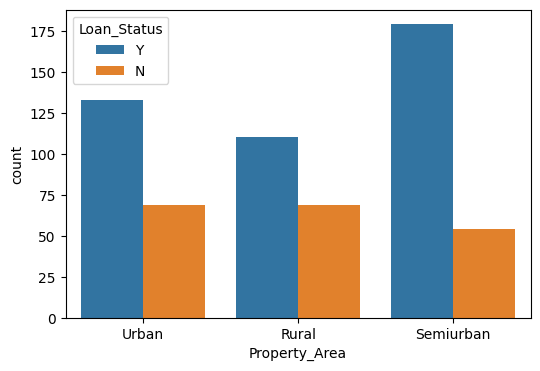

In [95]:
plt.figure(figsize=(6,4))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.show()

Education v/s Loan status

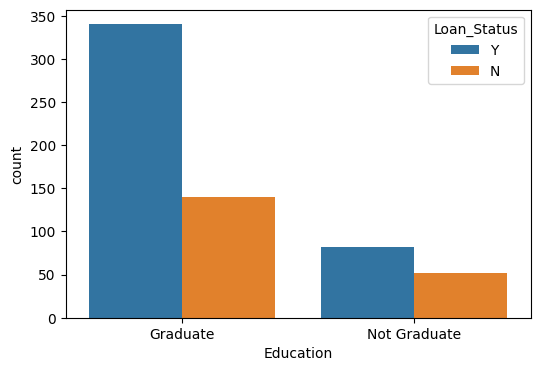

In [96]:
plt.figure(figsize=(6,4))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.show()

Gender v/s Loan status

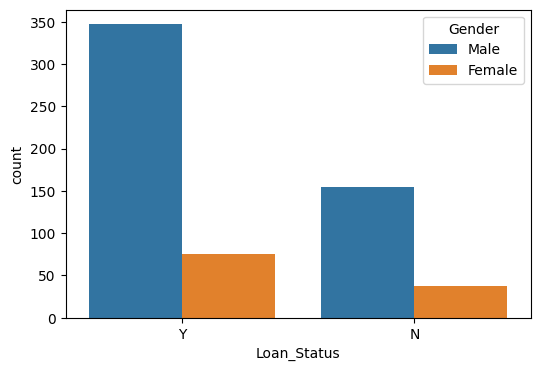

In [97]:
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', hue='Gender', data=df)
plt.show()

Credit history v/s Loan status

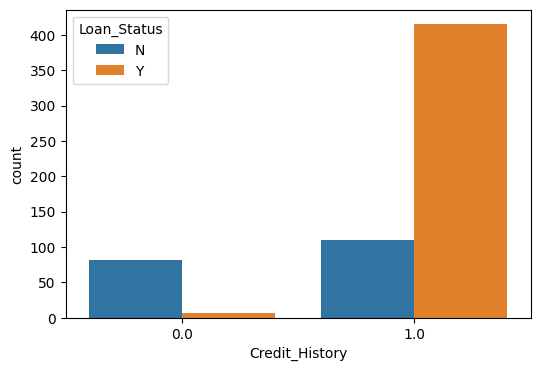

In [98]:
plt.figure(figsize=(6,4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.show()

Applicant income by Education

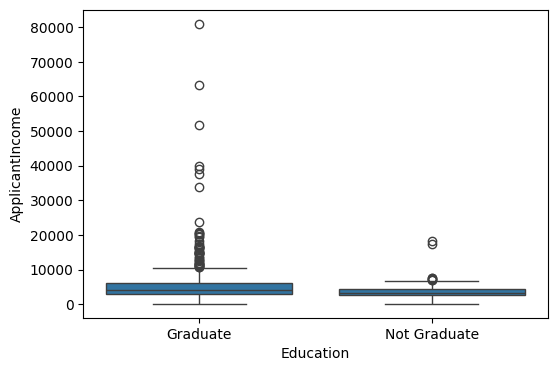

In [99]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.show()

Loan amount by loan status

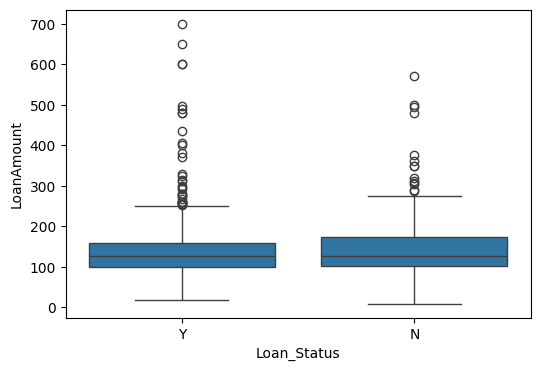

In [100]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.show()

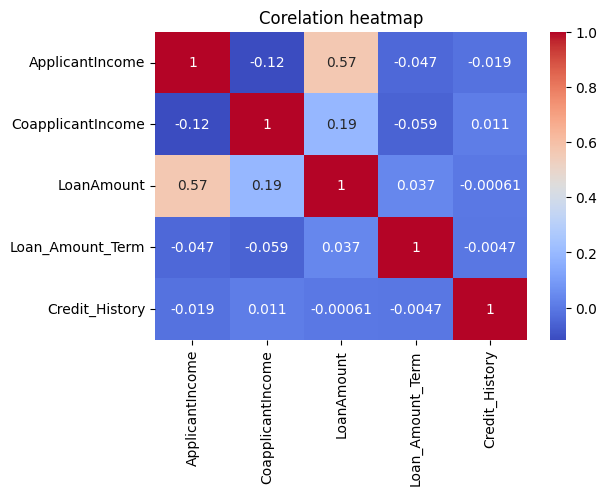

In [101]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Corelation heatmap')
plt.show()

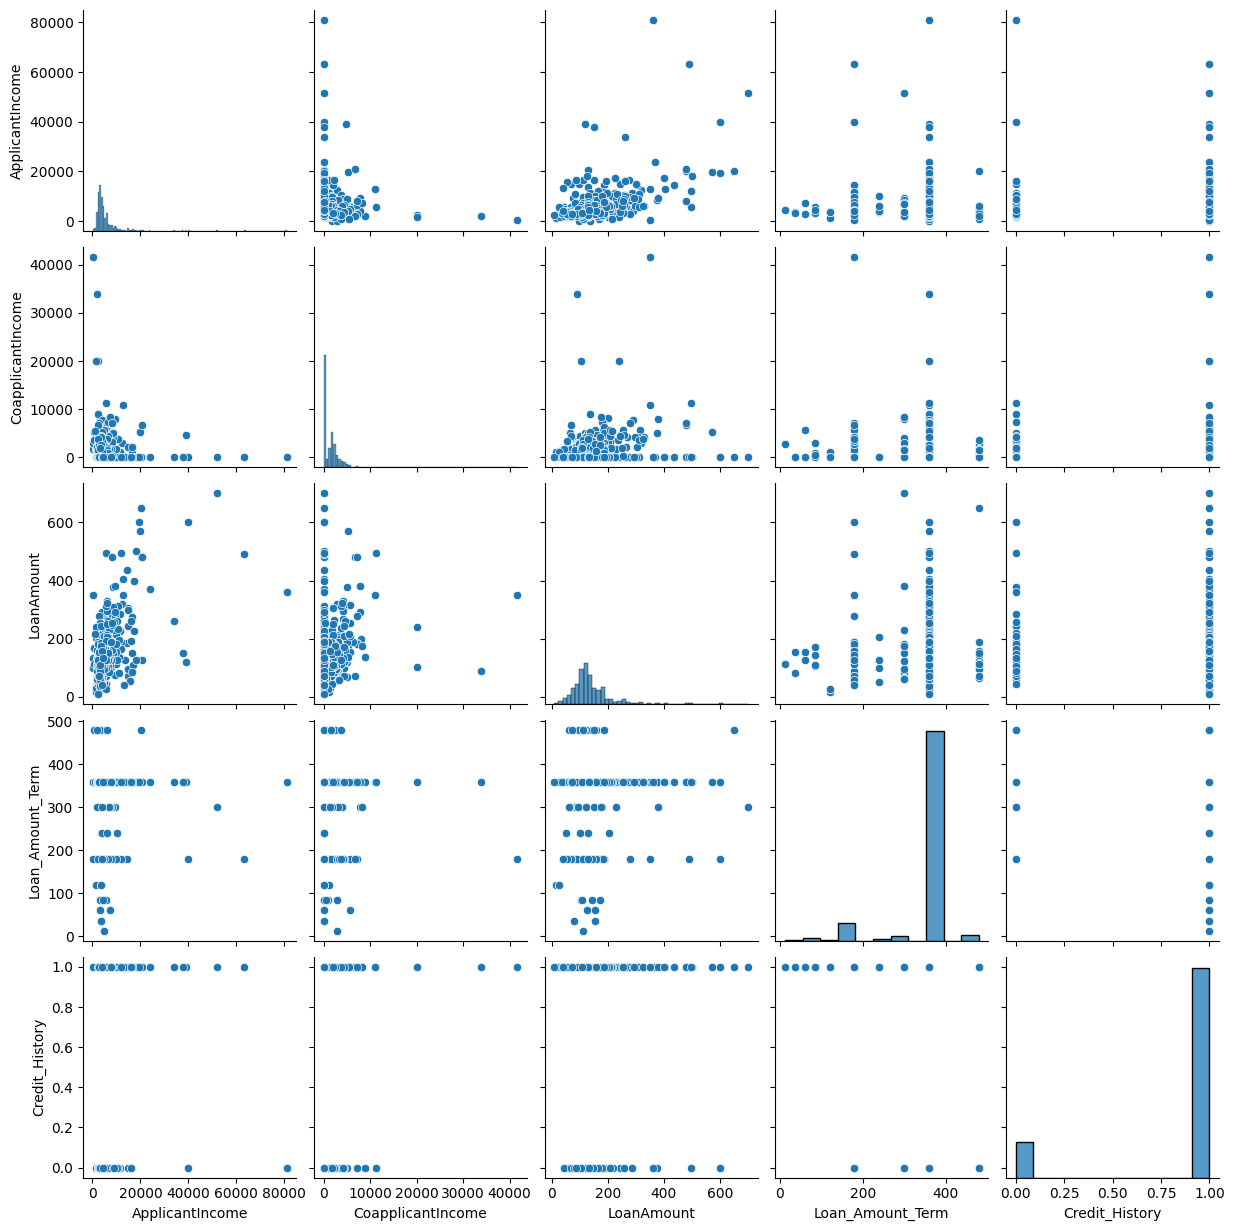

In [102]:
sns.pairplot(df)
plt.show()

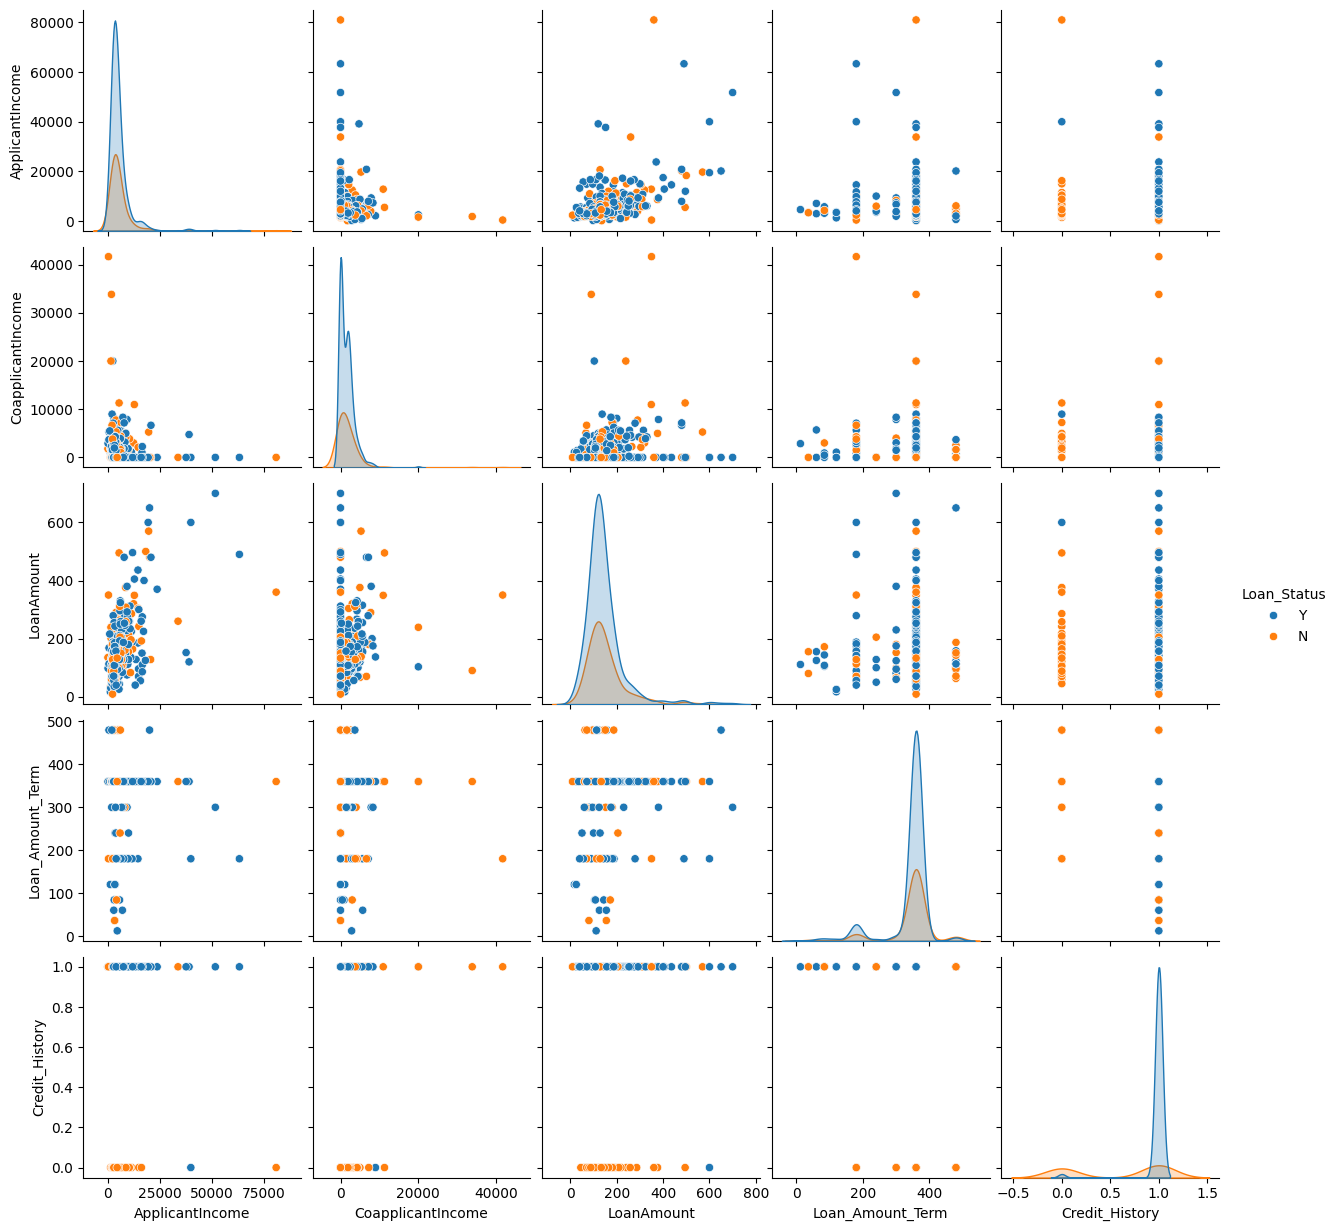

In [103]:
sns.pairplot(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']],hue='Loan_Status')

In [104]:
df['ApplicantIncome_log']=np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome_log']=np.log1p(df['CoapplicantIncome'])
df['LoanAmount_log']=np.log1p(df['LoanAmount'])

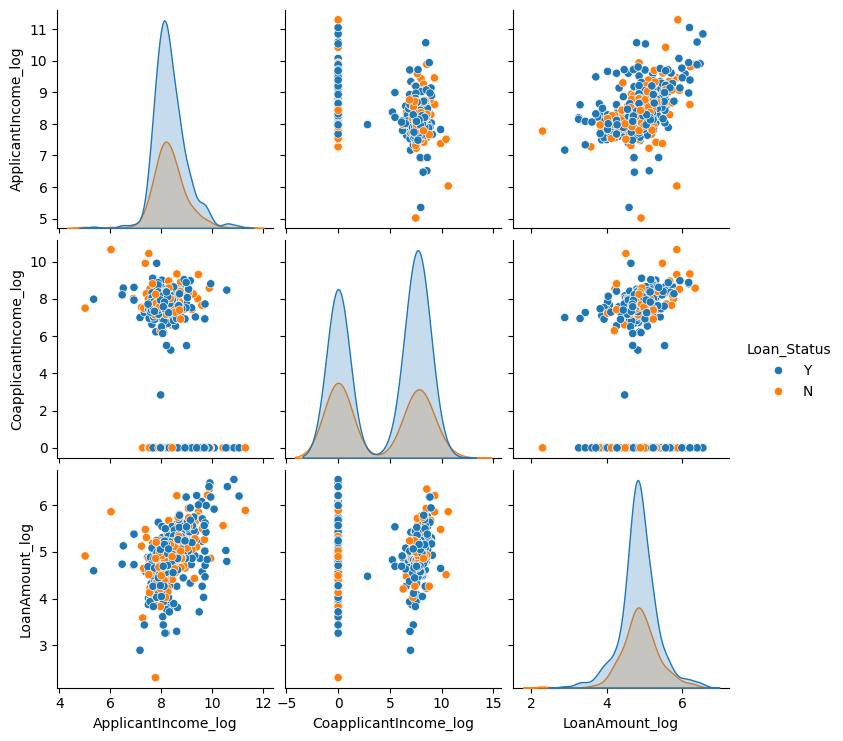

In [105]:
sns.pairplot(df[['ApplicantIncome_log','CoapplicantIncome_log','LoanAmount_log','Loan_Status']],hue='Loan_Status')

categorical vs categorical (Chi-square test)

1) Is gender associated with loan approval ?

Null Hypothesis (H₀): Gender and Loan_Status are independent (no association)

Alternative Hypothesis (H₁): Gender and Loan_Status are dependent (there is an association)

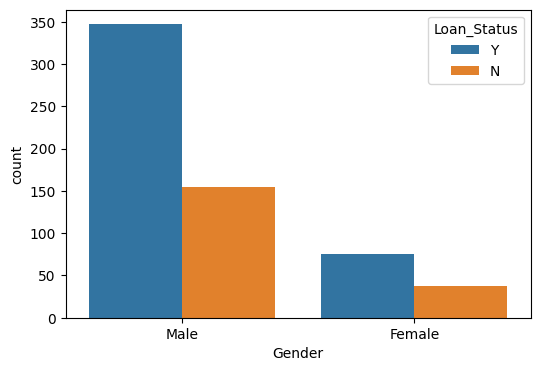

In [106]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.show()

In [107]:
import scipy.stats as stats
contigency_table=pd.crosstab(df['Gender'],df['Loan_Status'])
contigency_table

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


In [108]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-square statistic: 0.11087854691241235
p-value: 0.7391461310869638
Degrees of freedom: 1
Expected frequencies: [[ 35.0228013  76.9771987]
 [156.9771987 345.0228013]]


In [109]:
if p < 0.05:
    print("Reject the null hypothesis. Gender is associated with loan approval.")
else:
    print("Fail to reject the null hypothesis. Gender is not associated with loan approval.")

Fail to reject the null hypothesis. Gender is not associated with loan approval.


2) Does education level affect approval rate?

Null Hypothesis (H₀): Education and Loan_Status are independent (no association)

Alternative Hypothesis (H₁): Education and Loan_Status are dependent (there is an association)

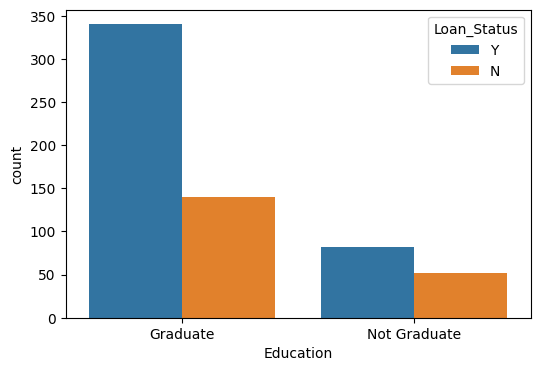

In [110]:
plt.figure(figsize=(6,4))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.show()

In [111]:
contigency_table=pd.crosstab(df['Education'],df['Loan_Status'])
contigency_table

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [112]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-square statistic: 4.091490413303621
p-value: 0.04309962129357355
Degrees of freedom: 1
Expected frequencies: [[150.09771987 329.90228013]
 [ 41.90228013  92.09771987]]


In [113]:
if p < 0.05:
    print("Reject the null hypothesis. Education level is associated with loan approval.")
else:
    print("Fail to reject the null hypothesis. Education level is not associated with loan approval.")

Reject the null hypothesis. Education level is associated with loan approval.


3) Are married applicants more likely to get approved?

Null Hypothesis (H₀): Marital status and loan approval are independent (i.e., being married does not affect the likelihood of approval).
Alternative Hypothesis (H₁): Marital status and loan approval are dependent (i.e., being married does affect the likelihood of approval).

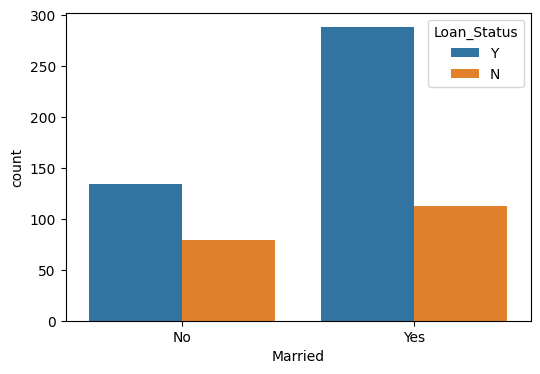

In [114]:
plt.figure(figsize=(6,4))
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.show()

In [115]:
contigency_table=pd.crosstab(df['Married'],df['Loan_Status'])
contigency_table

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


In [116]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-square statistic: 4.73187557933362
p-value: 0.029608580862582116
Degrees of freedom: 1
Expected frequencies: [[ 66.60586319 146.39413681]
 [125.39413681 275.60586319]]


In [117]:
if p<0.05:
  print("Reject the null hypothesis. Marital status is associated with loan approval.")
else:
  print("Fail to reject the null hypothesis. Marital status is not associated with loan approval.")

Reject the null hypothesis. Marital status is associated with loan approval.


4) Does self-employment affect loan approval?

Null Hypothesis (H₀): Self-employment and loan approval are independent (i.e., being self=employeed does not affect the likelihood of approval).

Alternative Hypothesis (H₁): Self-employment and loan approval are dependent (i.e., being self-employed does affect the likelihood of approval).

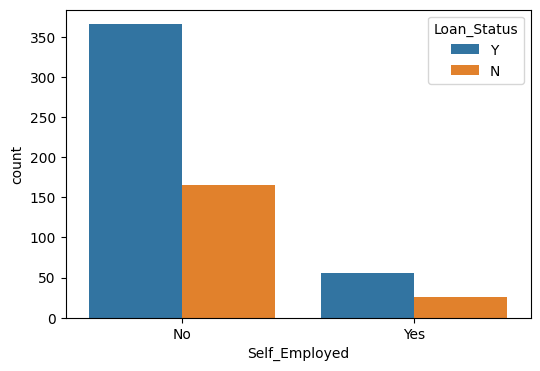

In [118]:
plt.figure(figsize=(6,4))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.show()

In [119]:
contigency_table=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
contigency_table

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


In [120]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 1
Expected frequencies: [[166.35830619 365.64169381]
 [ 25.64169381  56.35830619]]


In [121]:
if p<0.5:
  print("Reject the null hypothesis. Self-employment is associated with loan approval.")
else:
  print("Fail to reject the null hypothesis. Self-employment is not associated with loan approval.")

Fail to reject the null hypothesis. Self-employment is not associated with loan approval.


5) Is property area related to loan approval?

Null Hypothesis (H₀): Property area and loan approval are independent.

Alternative Hypothesis (H₁): Property area and loan approval are dependent.

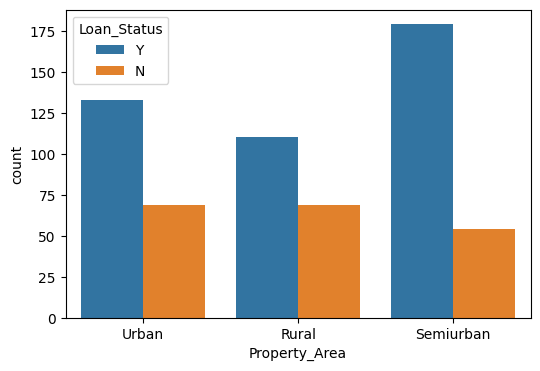

In [122]:
plt.figure(figsize=(6,4))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.show()

In [123]:
contigency_table=pd.crosstab(df['Property_Area'],df['Loan_Status'])
contigency_table

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [124]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-square statistic: 12.297623130485675
p-value: 0.0021360187811644937
Degrees of freedom: 2
Expected frequencies: [[ 55.97394137 123.02605863]
 [ 72.85993485 160.14006515]
 [ 63.16612378 138.83387622]]


In [125]:
if p<0.05:
  print("Reject the null hypothesis. Property area is associated with loan approval.")
else:
  print("Fail to reject the null hypothesis. Property area is not associated with loan approval.")

Reject the null hypothesis. Property area is associated with loan approval.


Numerical vs categorical

1) Do approved applicants have higher incomes?

Null Hypothesis (H₀): There is no difference in mean income of approved and non-approved applicants.

Alternative Hypothesis (H₁): The mean income of approved applicants is different from that of not approved applicants.

In [126]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

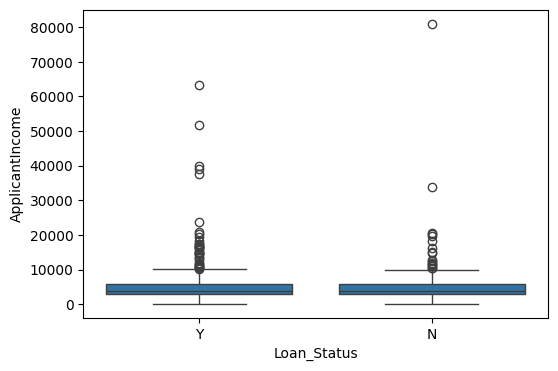

In [127]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.show()

In [128]:
from scipy.stats import ttest_ind
approved_applicants=df[df['Loan_Status']=='Y']['TotalIncome']
non_approved_applicants=df[df['Loan_Status']=='N']['TotalIncome']

In [129]:
t_test, p = ttest_ind(approved_applicants, non_approved_applicants)
print('t-statistic:', t_test)
print('p-value:', p)

t-statistic: -0.773974858431208
p-value: 0.4392445339235994


In [130]:
if p<0.05:
  print("Reject the null hypothesis. There is a significant difference in mean income between approved and non-approved applicants.")
else:
  print("Fail to reject the null hypothesis. There is no significant difference in mean income between approved and non-approved applicants.")

Fail to reject the null hypothesis. There is no significant difference in mean income between approved and non-approved applicants.


2) Is average loan amount different for approved vs rejected loans?

Null Hypothesis (H₀): There is no difference in mean loan amount of approved and non-approved applicants.

Alternative Hypothesis (H₁): The mean loan amount of approved applicants is different from that of not approved applicants.

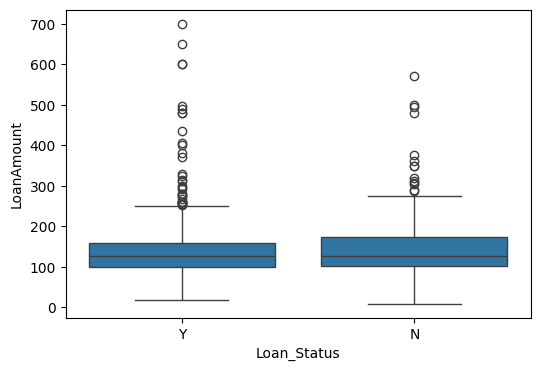

In [131]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.show()

In [132]:
df['approved_applicants']=df[df['Loan_Status']=='Y']['LoanAmount']
df['non_approved_applicants']=df[df['Loan_Status']=='N']['LoanAmount']

In [133]:
t_test, p = ttest_ind(approved_applicants, non_approved_applicants)
print('t-statistic:', t_test)
print('p-value:', p)

t-statistic: -0.773974858431208
p-value: 0.4392445339235994


In [134]:
if p<0.05:
  print("Reject the null hypothesis. There is a significant difference in mean loan amount between approved and non-approved applicants.")
else:
  print("Fail to reject the null hypothesis. There is no significant difference in mean loan amount between approved and non-approved applicants.")

Fail to reject the null hypothesis. There is no significant difference in mean loan amount between approved and non-approved applicants.


3) Do graduate and non-graduate applicants have different incomes?

Null Hypothesis (H₀): There is no difference in mean income of graduate and non-graduate.

Alternative Hypothesis (H₁): The mean income of graduate is different from non-graduate.

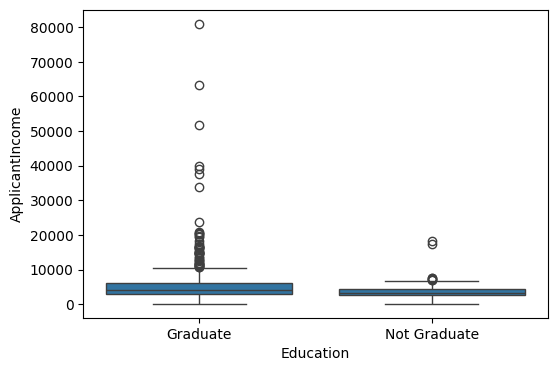

In [135]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.show()

In [136]:
graduate_applicants=df[df['Education']=='Graduate']['ApplicantIncome']
non_graduate_applicants=df[df['Education']=='Not Graduate']['ApplicantIncome']

In [137]:
t_test, p = ttest_ind(graduate_applicants, non_graduate_applicants)
print('t-statistic:', t_test)
print('p-value:', p)

t-statistic: 3.5172355275601177
p-value: 0.0004683635451121977


In [138]:
if p<0.05:
  print("Reject the null hypothesis. There is a significant difference in mean income of graduate and non-graduate applicants.")
else:
  print("Fail to reject the null hypothesis. There is no significant difference in mean income of graduate and non-graduate applicants.")

Reject the null hypothesis. There is a significant difference in mean income of graduate and non-graduate applicants.


4) Do urban, semi-urban and rural area people have significant difference in their income?

Null Hypothesis (H₀): There is no difference in mean income of urban, semi-urban and rural area applicant.

Alternative Hypothesis (H₁): There is significant difference in mean income of urban, semi-urban and rural area applicant.


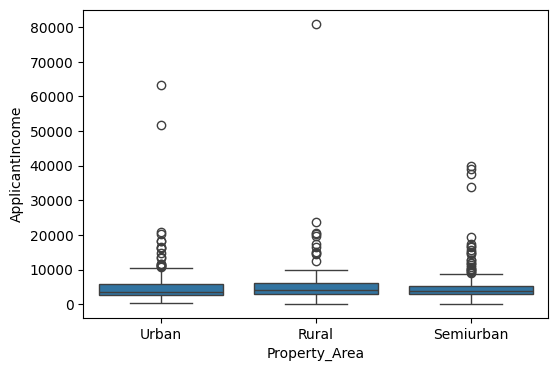

In [139]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Property_Area', y='ApplicantIncome', data=df)
plt.show()

In [140]:
Urban_income=df[df['Property_Area']=='Urban']['TotalIncome']
SemiUrban_income=df[df['Property_Area']=='Semiurban']['TotalIncome']
Rural_income=df[df['Property_Area']=='Rural']['TotalIncome']

Urban_income_mean=df[df['Property_Area']=='Urban']['TotalIncome'].mean()
SemiUrban_income_mean=df[df['Property_Area']=='Semiurban']['TotalIncome'].mean()
Rural_income_mean=df[df['Property_Area']=='Rural']['TotalIncome'].mean()

In [141]:
print('Urban_income:', Urban_income_mean)
print('SemiUrban_income:', SemiUrban_income_mean)
print('Rural_income:', Rural_income_mean)

Urban_income: 7114.598019741584
SemiUrban_income: 6812.394849785408
Rural_income: 7199.6207821275975


In [142]:
from scipy.stats import f_oneway
f_stat, p = f_oneway(Urban_income, SemiUrban_income, Rural_income)
print('F-statistic:', f_stat)
print('p-value:', p)

F-statistic: 0.2105530856051322
p-value: 0.8101948039912461


In [143]:
if p<0.05:
  print("Reject the null hypothesis. There is a significant difference in mean income of urban, semi-urban and rural area applicants.")
else:
  print("Fail to reject the null hypothesis. There is no significant difference in mean income of urban, semi-urban and rural area applicants.")

Fail to reject the null hypothesis. There is no significant difference in mean income of urban, semi-urban and rural area applicants.


Numerical vs numerical

1) Is loan amount correlated with applicant income?  (Pearson correlation)

Null Hypothesis (H₀): The loan amount and applicant income are not correlated.

Alternative Hypothesis (H₁): The loan amount and applicant income are correlated.

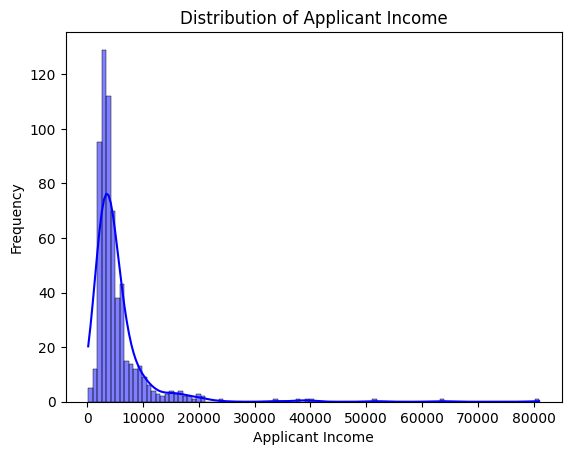

In [144]:
sns.histplot(df['ApplicantIncome'], bins=100, kde=True, color='blue', edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Income')
plt.show()

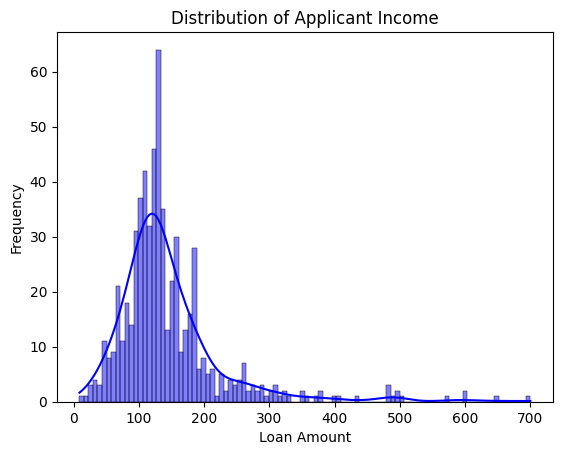

In [145]:
sns.histplot(df['LoanAmount'], bins=100, kde=True, color='blue', edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Income')
plt.show()

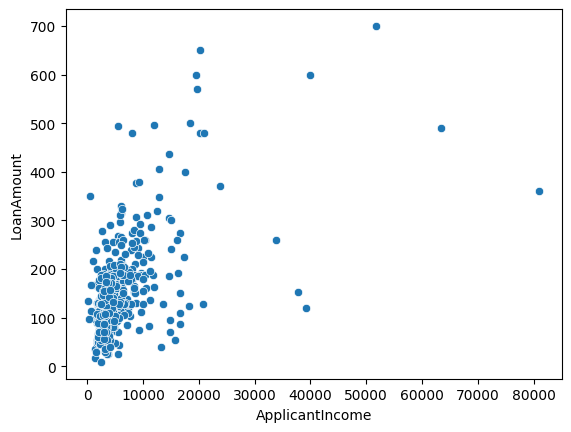

In [146]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)
plt.show()

In [147]:
corr_coef, p = stats.pearsonr(df['ApplicantIncome'],df['LoanAmount'])
print("Pearson correlation coefficiant ", corr_coef)
print("p-value ", p)

Pearson correlation coefficiant  0.5651805176233125
p-value  4.1112564880770056e-53


In [148]:
if p<0.05:
  print("Reject the null hypothesis. The loan amount and applicant income are correlated.")
else:
  print("Fail to reject the null hypothesis. The loan amount and applicant income are not correlated.")

Reject the null hypothesis. The loan amount and applicant income are correlated.


2) Is loan amount correlated with coapplicant income? (Pearson correlation)

Null Hypothesis (H₀): The loan amount and coapplicant income are not correlated.

Alternative Hypothesis (H₁): The loan amount and coapplicant income are correlated.


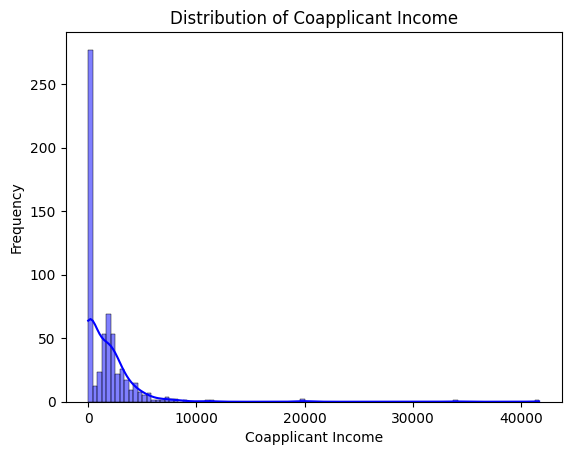

In [149]:
sns.histplot(df['CoapplicantIncome'], bins=100, kde=True, color='blue', edgecolor='black')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Coapplicant Income')
plt.show()

In [150]:
corr_coef, p = stats.pearsonr(df['CoapplicantIncome'],df['LoanAmount'])
print("Pearson correlation coefficiant ", corr_coef)
print("p-value ", p)

Pearson correlation coefficiant  0.18921778196662542
p-value  2.337693442150449e-06


In [151]:
if p<0.05:
  print("Reject the null hypothesis. The loan amount and coapplicant income are correlated.")
else:
  print("Fail to reject the null hypothesis. The loan amount and coapplicant income are not correlated.")

Reject the null hypothesis. The loan amount and coapplicant income are correlated.


3) Is loan amount correlated with total income? (Pearson correlation)

Null Hypothesis (H₀): The loan amount and total income are not correlated.

Alternative Hypothesis (H₁): The loan amount and total income are correlated.


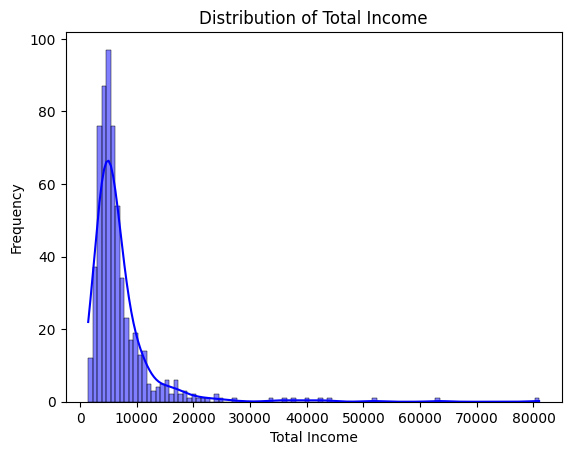

In [152]:
sns.histplot(df['TotalIncome'], bins=100, kde=True, color='blue', edgecolor='black')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.title('Distribution of Total Income')
plt.show()

In [153]:
corr_coef, p = stats.pearsonr(df['TotalIncome'],df['LoanAmount'])
print("Pearson correlation coefficiant ", corr_coef)
print("p-value ", p)

Pearson correlation coefficiant  0.6203155389930866
p-value  1.4305772731803184e-66


In [154]:
if p<0.05:
  print("Reject the null hypothesis. The loan amount and total income are correlated.")
else:
  print("Fail to reject the null hypothesis. The loan amount and total income are not correlated.")

Reject the null hypothesis. The loan amount and total income are correlated.


##Feature Engineering

In [155]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['LoanAmount_log']=np.log1p(df['LoanAmount'])
df['EMI']=df['LoanAmount']/df['Loan_Amount_Term']
df['BalanceIncome']=df['TotalIncome']-df['EMI']*1000

In [156]:
print(df['TotalIncome'].max())
print(df['TotalIncome'].min())
print(df['TotalIncome'].mean())

81000.0
1442.0
7024.705081414722


In [157]:
df['IncomeBin']=pd.cut(df['TotalIncome'], bins=[0,2500,4000,8000,81000], labels=['Low','Average','High','Very High'])

In [158]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [159]:
df.drop(['approved_applicants','non_approved_applicants'], axis=1, inplace=True)

In [160]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [161]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,TotalIncome,EMI,BalanceIncome,IncomeBin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,8.674197,0.000000,4.859812,5849.0,0.355556,5493.444444,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430327,7.319202,4.859812,6091.0,0.355556,5735.444444,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006701,0.000000,4.204693,3000.0,0.183333,2816.666667,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.857094,7.765993,4.795791,4941.0,0.333333,4607.666667,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699681,0.000000,4.955827,6000.0,0.391667,5608.333333,High


In [162]:
df.to_csv('cleaned_loan_prediction_data.csv', index=False)

In [163]:
from google.colab import files
files.download('cleaned_loan_prediction_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [164]:
!ls

cleaned_loan_prediction_data.csv  sample_data  train.csv


# Fianl Insights

1) Approval rate
- 68.73% of total applicants were approved.
- This indicates a moderately lenient loan approval process, bur around 31% are still getting rejected.

2) Impact of Credit History
- Applicants with a credit history (value = 1) were far more likely to be approved.
- Without credit history, approval rate drops drastically.

Credit history is the most influential feature.

3) Income and Approval
- Approved applicants tend to have a slightly higher total income on average.
- However, income alone isn’t a strong predictor — many high-income applicants are still denied if credit history is missing.

4) EMI and Loan Amount
- Most approved loans have moderate loan amounts and reasonable EMIs.
- Extremely high loan amounts or high EMIs reduce approval chances, especially for low-income applicants.

5) Demographic Influence
- Gender, Marital Status, and Education have minor or no direct effect on loan approval when isolated.
- However, Graduate applicants do slightly better in terms of approval.
- Property Area: Semiurban applicants seem to have slightly higher approval rates than urban/rural.

# Rcommandations

1) Automate credit-based pre-screening

- Prioritize applicants with positive credit history using a scoring mechanism.

- Reduce human workload by auto-filtering ineligible applicants.

2) Introduce personalized EMI plans

- Tailor EMI plans based on applicant income to improve affordability and reduce defaults.

3) Educate applicants about credit history

- Launch awareness campaigns or workshops for building and maintaining credit records.

4) Use ML models for smarter approvals

- Train machine learning models using these variables (Credit History, Total Income, Loan Amount, EMI, etc.)

- Build a scoring system to predict approval chances before manual review.

